<a href="https://colab.research.google.com/github/jylin97/CS4185-2022/blob/master/CS4185_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load image database.

In [10]:
!rm -rf /content/__MACOSX/
!rm -rf sample_data

In [1]:
!wget https://github.com/jylin97/CS4185-2022/raw/master/images.zip
!unzip /content/images.zip

--2022-08-29 13:52:13--  https://github.com/jylin97/CS4185-2022/raw/master/images.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jylin97/CS4185-2022/master/images.zip [following]
--2022-08-29 13:52:13--  https://raw.githubusercontent.com/jylin97/CS4185-2022/master/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31824739 (30M) [application/zip]
Saving to: ‘images.zip.2’

images.zip.2        100%[===================>]  30.35M  --.-KB/s    in 0.1s    

2022-08-29 13:52:13 (241 MB/s) - ‘images.zip.2’ saved [31824739/31824739]

Archive:  /content/images.zip
replace beach.jpg? [y]e

In [2]:
import cv2 as cv
import numpy as np
from glob import glob
from google.colab.patches import cv2_imshow

In [3]:
# the directory of the image database
database_dir = "image.orig"
# Compute pixel-by-pixel difference and return the sum
def compareImgs(img1, img2):
    # resize img2 to img1
	img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))
	diff = cv.absdiff(img1, img2)
	return diff.sum()

In [4]:
def retrieval():
	print("1: beach")
	print("2: building")
	print("3: bus")
	print("4: dinosaur")
	print("5: flower")
	print("6: horse")
	print("7: man")
	choice = input("Type in the number to choose a category and type enter to confirm\n")
	if choice == '1':
		src_input = cv.imread("beach.jpg")
		print("You choose: %s - beach\n" % choice)
	if choice == '2':
		src_input = cv.imread("building.jpg")
		print("You choose: %s - building\n" % choice)
	if choice == '3':
		src_input = cv.imread("bus.jpg")
		print("You choose: %s - bus\n" % choice)
	if choice == '4':
		src_input = cv.imread("dinosaur.jpg")
		print("You choose: %s - dinosaur\n" % choice)
	if choice == '5':
		src_input = cv.imread("flower.jpg")
		print("You choose: %s - flower\n" % choice)
	if choice == '6':
		src_input = cv.imread("horse.jpg")
		print("You choose: %s - horse\n" % choice)
	if choice == '7':
		src_input = cv.imread("man.jpg")
		print("You choose: %s - man\n" % choice)	

	cv2_imshow(src_input)

	# change the image to gray scale
	src_gray = cv.cvtColor(src_input, cv.COLOR_BGR2GRAY)

	# read image database
	database = sorted(glob(database_dir + "/*.jpg"))

	min_diff = 1e50

	for img in database:
		# read image
		img_rgb = cv.imread(img)
		# convert to gray scale
		img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
		# compare the two images
		diff = compareImgs(src_gray, img_gray)
		# find the minimum difference
		if diff <= min_diff:
			# update the minimum difference
			max_img = img_rgb
			min_diff = diff
			result = img
	
	print("the most similar image is %s, the pixel-by-pixel difference is %f " % (result, min_diff))
	print("\n")

	cv2_imshow(max_img)
	cv.waitKey(0)
	cv.destroyAllWindows()

1: beach
2: building
3: bus
4: dinosaur
5: flower
6: horse
7: man
Type in the number to choose a category and type enter to confirm
1
You choose: 1 - beach



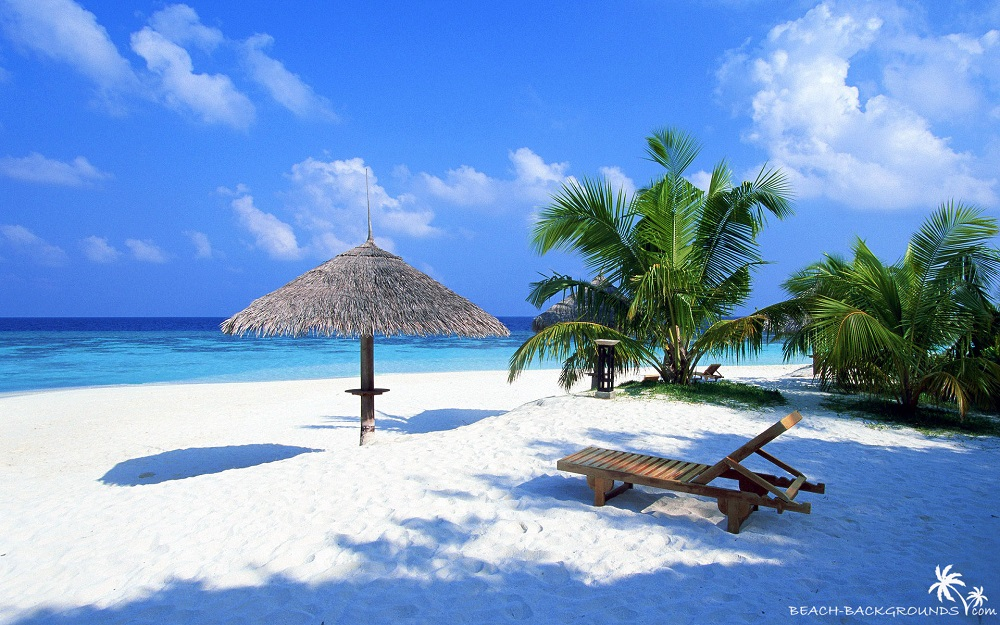

the most similar image is image.orig/138.jpg, the pixel-by-pixel difference is 30241636.000000 




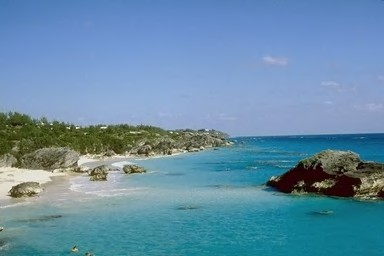

In [5]:
retrieval()

In [6]:
def SIFT():
	img1 = cv.imread("flower.jpg", cv.IMREAD_GRAYSCALE)
	img2 = cv.imread("image.orig/685.jpg", cv.IMREAD_GRAYSCALE)
	if img1 is None or img2 is None:
		print('Error loading images!')
		exit(0)
	#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
	minHessian = 400
	# detector = cv.xfeatures2d_SURF.create(hessianThreshold=minHessian)
	detector = cv.SIFT_create()
	keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
	keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
	#-- Step 2: Matching descriptor vectors with a brute force matcher
	# Since SURF is a floating-point descriptor NORM_L2 is used
	matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_BRUTEFORCE)
	matches = matcher.match(descriptors1, descriptors2)
	#-- Draw matches
	img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
	cv.drawMatches(img1, keypoints1, img2, keypoints2, matches, img_matches)
	#-- Show detected matches
	cv2_imshow(img_matches)
	cv.waitKey()

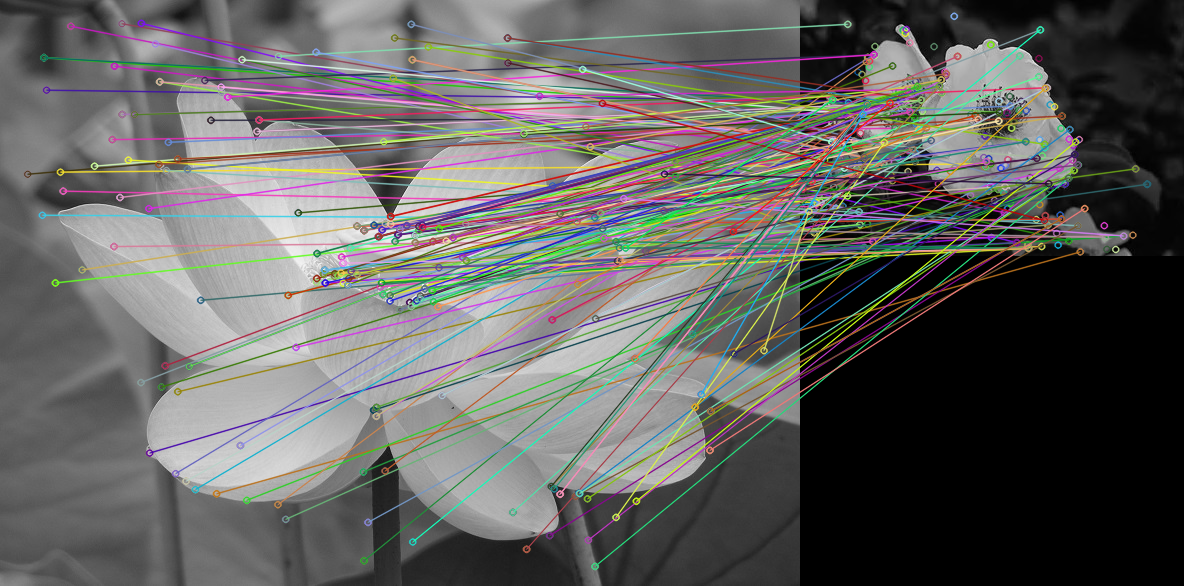

In [7]:
SIFT()

In [8]:
def main():
	print("1: Image retrieval demo")
	print("2: SIFT demo")
	number = int(input("Type in the number to choose a demo and type enter to confirm\n"))
	if number == 1:
		retrieval()
	elif number == 2:
		SIFT()
	else:
		print("Invalid input")
		exit()

In [9]:
# main()